Normalizacion: Poner los valores del arreglo de la imagen en intervalos de 0 a 1, con el objetivo de tener mas eficiencia al entrenar en nuestro modelo de Machine Learning

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2

In [26]:
!pip install h5py


In [27]:
import h5py

In [8]:
sub_directories = [
        'F_Banana', 'F_Lemon', 'F_Lulo', 'F_Mango', 'F_Orange',
        'F_Strawberry', 'F_Tamarillo', 'F_Tomato',
        'S_Banana', 'S_Lemon', 'S_Lulo', 'S_Mango', 'S_Orange',
        'S_Strawberry', 'S_Tamarillo', 'S_Tomato'
    ]
base_directory = 'C:\\Users\\Usuario\\Desktop\\DataSet\\6ps7gtp2wg-1\\FRUIT-16K'

In [9]:
def read_and_process_image(image_path, img_size, img_color='RGB'):
    image = cv2.imread(image_path)

    if img_color == 'RGB':
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    elif img_color == 'Gray':
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    imResize = cv2.resize(image, dsize=(img_size, img_size))
    imResize = imResize.astype("float32") / 255.0

    return imResize

In [11]:
def process_fruit_images(base_dir, img_size, img_color='RGB'):
  

    images = []
    labels = []

    for sub_dir in sub_directories:
        full_dir = os.path.join(base_dir, sub_dir)
        for filename in os.listdir(full_dir):
            if filename.endswith('.jpg'):
                image_path = os.path.join(full_dir, filename)
                processed_image = read_and_process_image(image_path, img_size, img_color)
                images.append(processed_image)
                labels.append(sub_dir)

    return images, labels

In [12]:
image_size = 224  
color_mode = 'RGB'

images, labels = process_fruit_images(base_directory, image_size, color_mode)

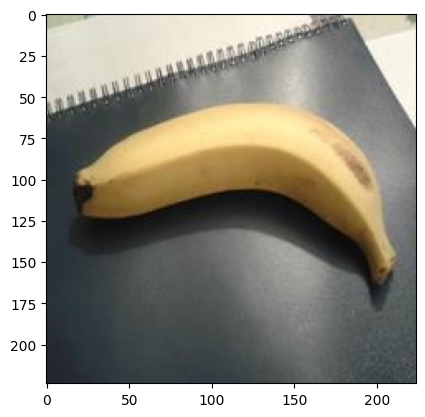

In [25]:
plt.imshow(images[1])

Exportarlos con formato Nympy y un csv para las labels

In [ ]:
# Guardar las imágenes como archivo NumPy
np.save('fruit_images.npy', np.array(images))

# Guardar las etiquetas en un archivo de texto (CSV)
with open('fruit_labels.csv', 'w') as label_file:
    label_file.write('Label\n')
    for label in labels:
        label_file.write(f'{label}\n')

Con h5

In [30]:
#Guardar en hpy
with h5py.File('fruit_data_save.h5', 'w') as hf:
    hf.create_dataset('images', data=images)
    hf.create_dataset('labels', data=labels)


In [32]:
# Luego, para cargar los datos desde el archivo HDF5, puedes hacer lo siguiente:
with h5py.File('fruit_data_save.h5', 'r') as hf:
    loaded_images = np.array(hf['images'])
    loaded_labels = np.array(hf['labels'])